# CF 6.6 Analysing Time Series Data (GDP)

## Table of Contents
1. Importing and reviewing data
2. Subsetting, wrangling and cleaning
3. Decomposition
4. Testing for stationarity
5. Stationarizing data

## 1. Importing and reviewing data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [3]:
# Configuring API key 

quandl.ApiConfig.api_key = 'QLeAg5AABybk18WBdbYQ'

In [4]:
# Importing the Federal Reserve Economic Data "GDP" variable.

data = quandl.get('FRED/A191RP1Q027SBEA')

In [5]:
# Checking import
data.head()

Value
Date             
1947-04-01    4.7
1947-07-01    6.0
1947-10-01   17.3
1948-01-01    9.6
1948-04-01   10.7

In [6]:
# Removing row limit for maximum visibility
pd.set_option('display.max_rows', None)

In [9]:
data.shape

(299, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

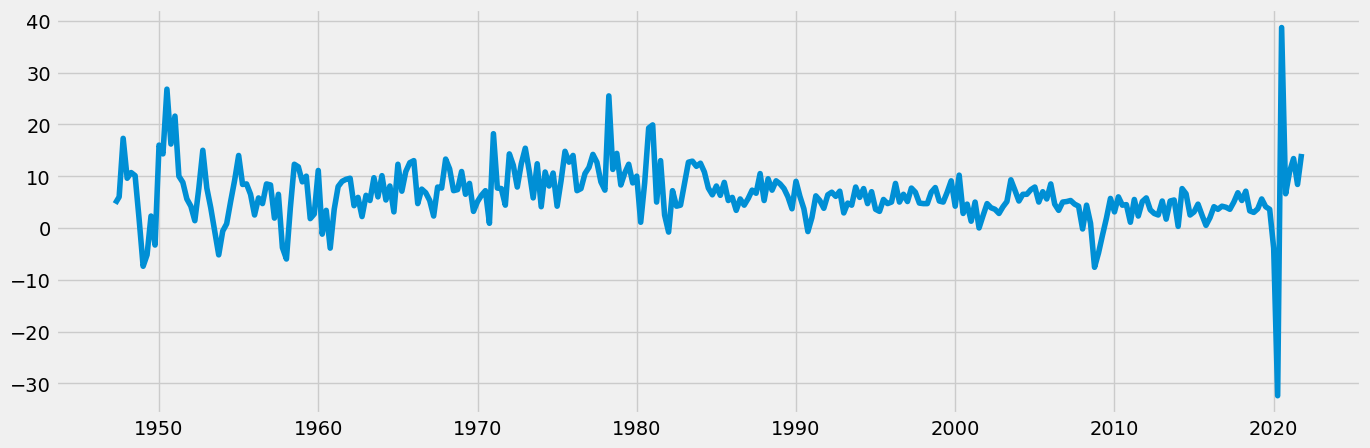

In [10]:
# Ploting the data 

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.savefig('GDP over time (expended) .png')
plt.plot(data)

## 2. Subsetting, wrangling and cleaning

In [11]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

Date  Value
0 1947-04-01    4.7
1 1947-07-01    6.0
2 1947-10-01   17.3
3 1948-01-01    9.6
4 1948-04-01   10.7

In [13]:
# Creating a subset that is relivent to my analysis
data_sub = data_2.loc[(data_2['Date'] >= '1990-01-01') & (data_2['Date'] < '2016-12-31')]

In [14]:
# Checking subset
data_sub.head()

Date  Value
171 1990-01-01    9.0
172 1990-04-01    6.1
173 1990-07-01    3.7
174 1990-10-01   -0.7
175 1991-01-01    2.0

In [15]:
data_sub.shape

(108, 2)

In [16]:
# resetting the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

Value
datetime         
1990-01-01    9.0
1990-04-01    6.1
1990-07-01    3.7
1990-10-01   -0.7
1991-01-01    2.0

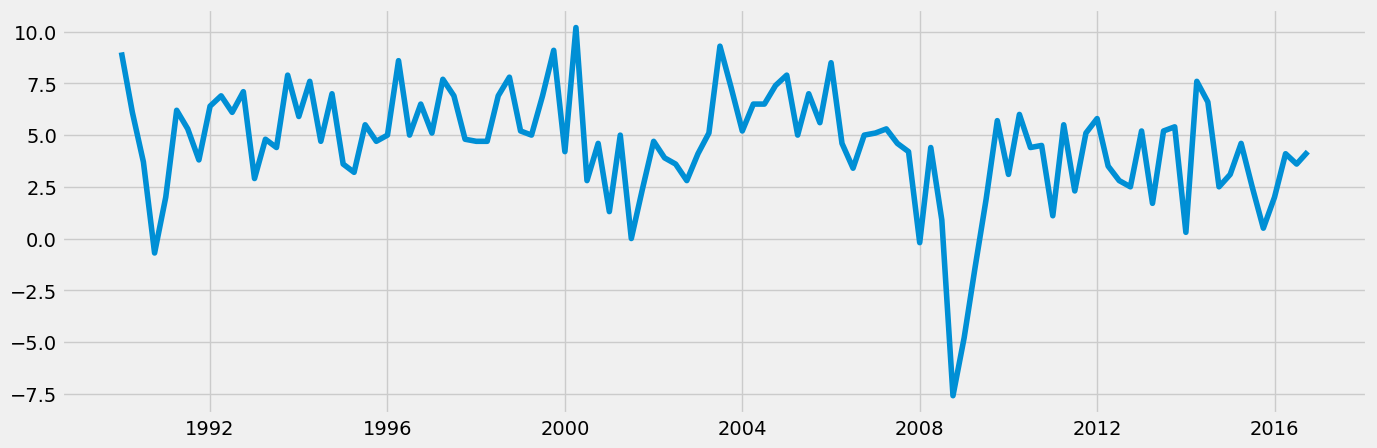

In [17]:
# Ploting the new subset 

plt.figure(figsize=(15,5), dpi=100) 
plt.savefig('GDP over time (shortened) .png')
plt.plot(data_sub)

In [24]:
# Checking for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [26]:
# Checking for duplicates

dups = data_sub.duplicated()
dups.sum()

43

In [30]:
# Investigating duplicates
dups

datetime
1990-01-01    False
1990-04-01    False
1990-07-01    False
1990-10-01    False
1991-01-01    False
1991-04-01    False
1991-07-01    False
1991-10-01    False
1992-01-01    False
1992-04-01    False
1992-07-01     True
1992-10-01    False
1993-01-01    False
1993-04-01    False
1993-07-01    False
1993-10-01    False
1994-01-01    False
1994-04-01    False
1994-07-01    False
1994-10-01    False
1995-01-01    False
1995-04-01    False
1995-07-01    False
1995-10-01     True
1996-01-01    False
1996-04-01    False
1996-07-01     True
1996-10-01    False
1997-01-01    False
1997-04-01    False
1997-07-01     True
1997-10-01     True
1998-01-01     True
1998-04-01     True
1998-07-01     True
1998-10-01    False
1999-01-01    False
1999-04-01     True
1999-07-01     True
1999-10-01    False
2000-01-01    False
2000-04-01    False
2000-07-01    False
2000-10-01    False
2001-01-01    False
2001-04-01     True
2001-07-01    False
2001-10-01    False
2002-01-01     True
2002-04-01 

In [29]:
# Cross referencing dublicates
data_sub

Value
datetime         
1990-01-01    9.0
1990-04-01    6.1
1990-07-01    3.7
1990-10-01   -0.7
1991-01-01    2.0
1991-04-01    6.2
1991-07-01    5.3
1991-10-01    3.8
1992-01-01    6.4
1992-04-01    6.9
1992-07-01    6.1
1992-10-01    7.1
1993-01-01    2.9
1993-04-01    4.8
1993-07-01    4.4
1993-10-01    7.9
1994-01-01    5.9
1994-04-01    7.6
1994-07-01    4.7
1994-10-01    7.0
1995-01-01    3.6
1995-04-01    3.2
1995-07-01    5.5
1995-10-01    4.7
1996-01-01    5.0
1996-04-01    8.6
1996-07-01    5.0
1996-10-01    6.5
1997-01-01    5.1
1997-04-01    7.7
1997-07-01    6.9
1997-10-01    4.8
1998-01-01    4.7
1998-04-01    4.7
1998-07-01    6.9
1998-10-01    7.8
1999-01-01    5.2
1999-04-01    5.0
1999-07-01    6.9
1999-10-01    9.1
2000-01-01    4.2
2000-04-01   10.2
2000-07-01    2.8
2000-10-01    4.6
2001-01-01    1.3
2001-04-01    5.0
2001-07-01    0.0
2001-10-01    2.4
2002-01-01    4.7
2002-04-01    3.9
2002-07-01    3.6
2002-10-01    2.8
2003-01-01    4.1
2003-04-01    5.1
2003-07-01    9.3
2003-10-01    7.3
2004-01-01    5.2
2004-04-01    6.5
2004-07-01    6.5
2004-10-01    7.4
2005-01-01    7.9
2005-04-01    5.0
2005-07-01    7.0
2005-10-01    5.6
2006-01-01    8.5
2006-04-01    4.6
2006-07-01    3.4
2006-10-01    5.0
2007-01-01    5.1
2007-04-01    5.3
2007-07-01    4.6
2007-10-01    4.2
2008-01-01   -0.2
2008-04-01    4.4
2008-07-01    0.9
2008-10-01   -7.6
2009-01-01   -4.8
2009-04-01   -1.4
2009-07-01    1.9
2009-10-01    5.7
2010-01-01    3.1
2010-04-01    6.0
2010-07-01    4.4
2010-10-01    4.5
2011-01-01    1.1
2011-04-01    5.5
2011-07-01    2.3
2011-10-01    5.1
2012-01-01    5.8
2012-04-01    3.5
2012-07-01    2.8
2012-10-01    2.5
2013-01-01    5.2
2013-04-01    1.7
2013-07-01    5.2
2013-10-01    5.4
2014-01-01    0.3
2014-04-01    7.6
2014-07-01    6.6
2014-10-01    2.5
2015-01-01    3.1
2015-04-01    4.6
2015-07-01    2.5
2015-10-01    0.5
2016-01-01    2.0
2016-04-01    4.1
2016-07-01    3.6
2016-10-01    4.2

##### There are no duplicate dates only values. As this is possible of this data ( GDP values being the same over time) I will leave the dataset as it is. 

##### There will be no need for data smoothing as the data is collected every 3 months. 

## 3. Decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
from pylab import rcParams # Defining fixed size for all charts
rcParams['figure.figsize'] = 18, 7

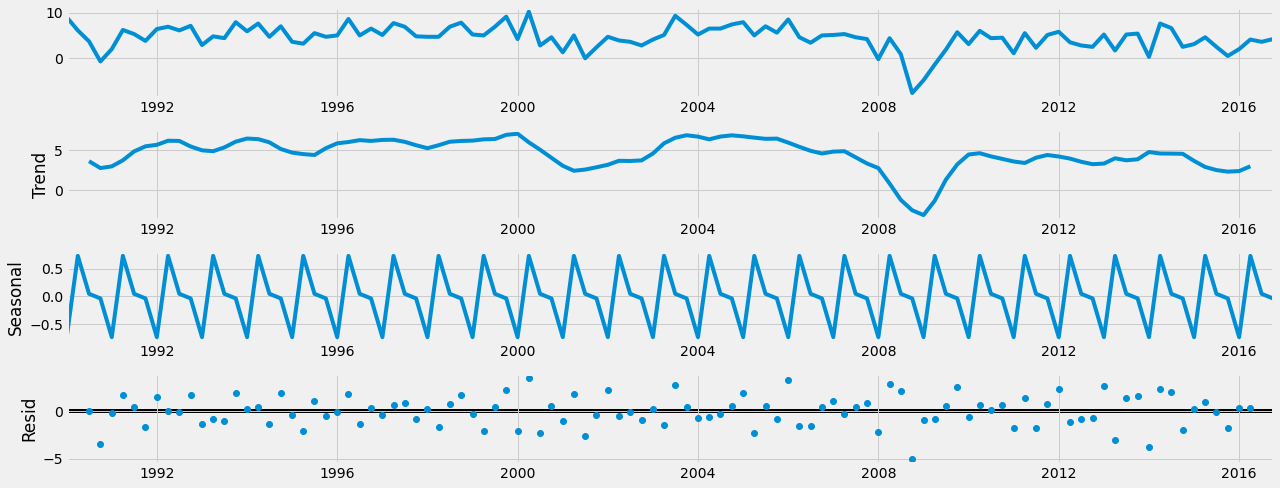

In [21]:
# Plotting the separate components

decomposition.plot()
plt.savefig('time decomposition.png')
plt.show()

## 4. Testing for stationarity

### Hypothesis 
##### Null Hypothesis -  There is a unit root.  (Data is stationary)
##### Alternative Hypothesis - There is no unit root. (Data is not stationary)


In [31]:
# Performing dickey_fuller test 

from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries):
  
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -4.557521
p-value                          0.000155
Number of Lags Used              1.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


##### In order to determine the results of a statistical hypothesis test, you have to compare the test statistic to the critical value of the relivent significance level.

##### If the test statistic is larger than the critical value, one can’t reject the null hypothesis. If the test statistic is smaller than the critical value, the null hypothesis could be rejected.

##### Here you can see that the Test Statistic is small than the Critical Value of 5%. This indicating that the null hypothesis CAN be rejected as my data is stationary. 

##### However, I will be performing further checks to see if I can make my data MORE stationary. 

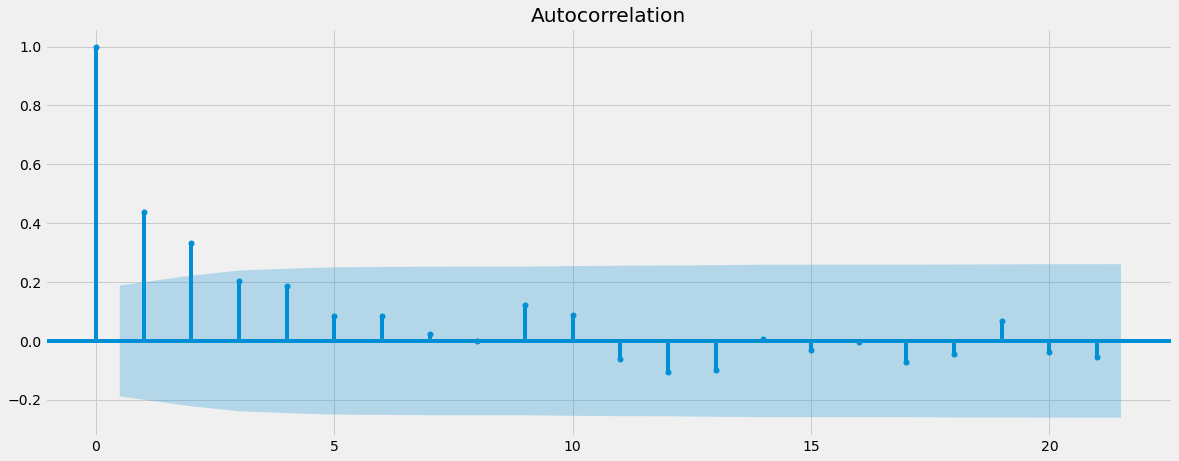

In [22]:
# Checking for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.savefig('Autocorrection 1 .png')
plt.show()

##### Here we cam see that most of the lags are within blue bar proving that most of my data is stationary.

## 5. Stationarizing Data

In [26]:
data_diff = data_sub - data_sub.shift(1) 

In [27]:
data_diff.dropna(inplace = True)

In [28]:
data_diff.head()

Value
datetime         
1990-04-01   -2.9
1990-07-01   -2.4
1990-10-01   -4.4
1991-01-01    2.7
1991-04-01    4.2

In [29]:
data_diff.columns

Index(['Value'], dtype='object')

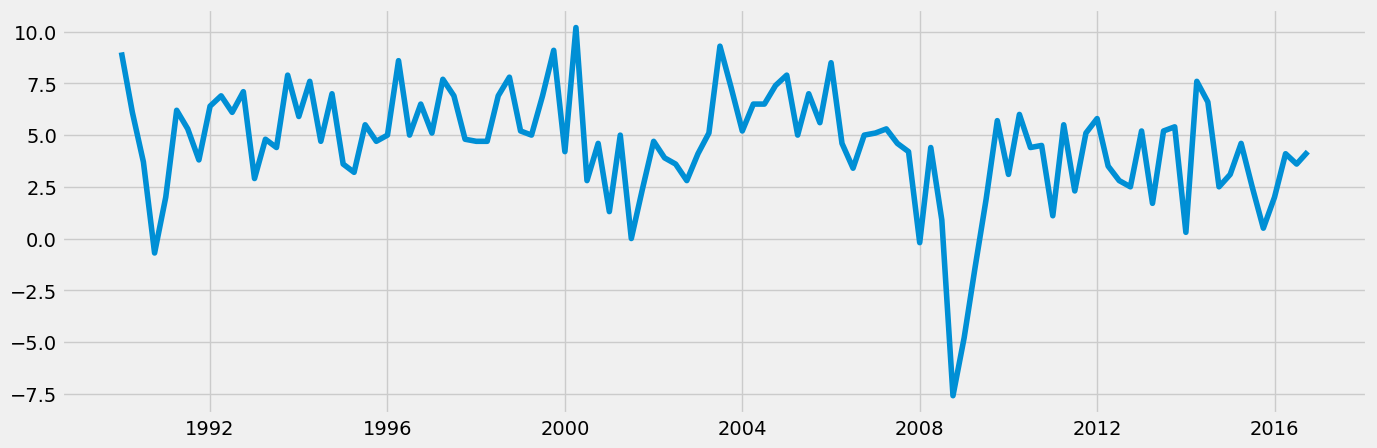

In [23]:
# Comparing data before and after differencing
plt.figure(figsize=(15,5), dpi=100)
plt.savefig('GDP over time (after differencing) .png')
plt.plot(data_sub)

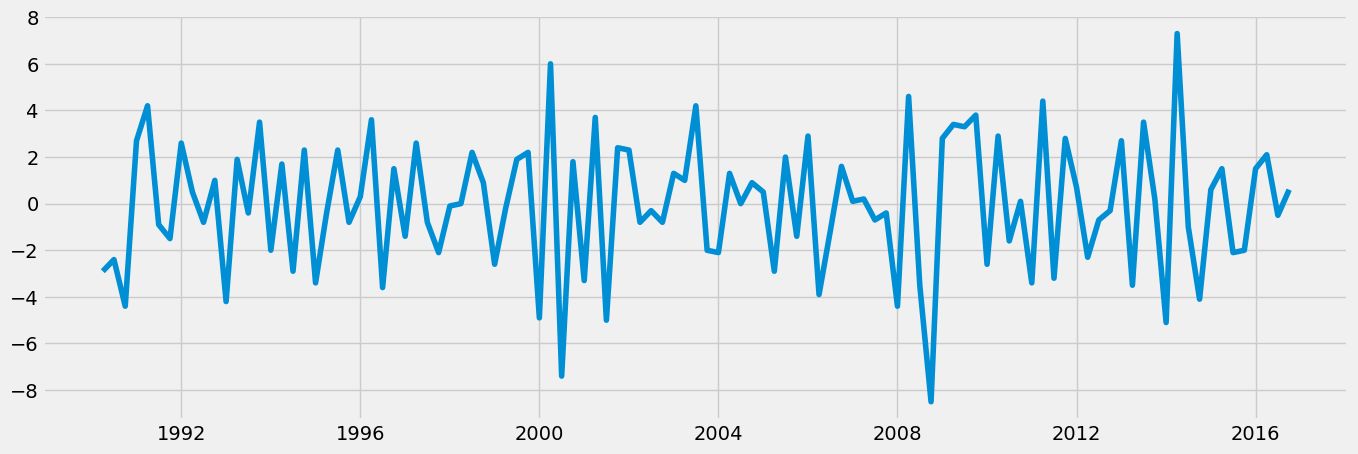

In [55]:
# Comparing data before and after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

###### The line has changed as more trend has been removed.

In [32]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.924524e+00
p-value                        1.019790e-14
Number of Lags Used            2.000000e+00
Number of Observations Used    1.040000e+02
Critical Value (1%)           -3.494850e+00
Critical Value (5%)           -2.889758e+00
Critical Value (10%)          -2.581822e+00
dtype: float64


##### Compared to the previous dickey_fuller test the Test Statistic has droped by over 4 from -4.557 to -8.924. Furthering the distance between the Critical Value and the Test Statistic shows that we have been able to futher stationise the data. 

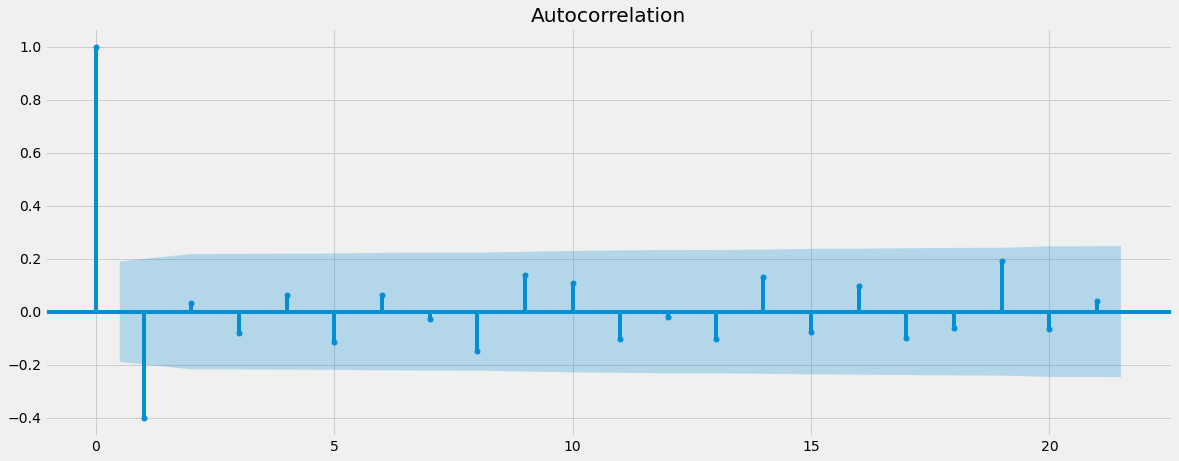

In [33]:
# Checking for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_diff)
plt.savefig('Autocorrection 2.png')
plt.show()

##### We can see that an additional lag has been added to the blue bar as the data has become more stationary since the last autocorrection test. 